# Load the dataset:

In [48]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/weather_data.csv')
data.head()

,date,temperature
0,2014-01-01,10.248357
1,2014-01-02,9.950428
2,2014-01-03,10.362958
3,2014-01-04,10.820167
4,2014-01-05,9.961091


* datatypes

In [49]:
data.dtypes

,0
date,object
temperature,float64


* description of the dataset

In [50]:
data.describe()

,temperature
count,2557.000000
mean,10.017472
std,0.923047
min,3.337291
25%,9.335195
50%,10.031778
75%,10.681384
max,15.587945


* to print the rows and columns

In [51]:
data.shape


(2557, 2)

* checking null values

In [52]:
print(data.isnull().sum())

date           0
temperature    0
dtype: int64


* Some graphs fot the dataset

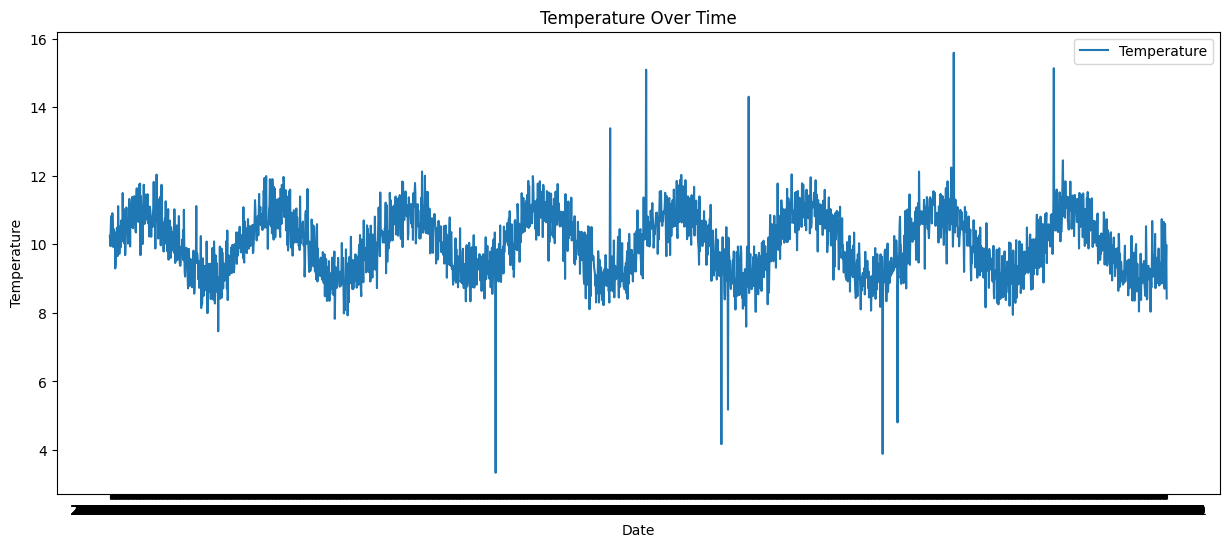

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['temperature'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


# Preprocess the data:

* Normalizing temprature column

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['temperature'] = scaler.fit_transform(data[['temperature']])

data['temperature'].values.reshape(-1, 1)


array([[0.56413854],
       [0.53981913],
       [0.57349321],
       ...,
       [0.48394521],
       [0.54273214],
       [0.41487258]])

In [56]:
sequence_length = 30
def create_sequences(data, seq_len):
    sequences = []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i + seq_len])
    return np.array(sequences)

temperature_sequences = create_sequences(data['temperature'].values, sequence_length)

* Splitting the dataset

In [63]:
split_index = int(len(temperature_sequences) * 0.8)
x_train = temperature_sequences[:split_index]
x_test = temperature_sequences[split_index:]

y_train = x_train
y_test = x_test

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (2021, 30)
y_train shape: (2021, 30)
x_test shape: (506, 30)
y_test shape: (506, 30)


#  Build an LSTM Autoencoder:

In [60]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed

model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(sequence_length),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer = 'adam' , loss ='mse')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 30, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_5 (RepeatVector)       │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 30, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 30, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 30, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model:

In [64]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.1749 - val_loss: 0.0257
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0203 - val_loss: 0.0098
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0

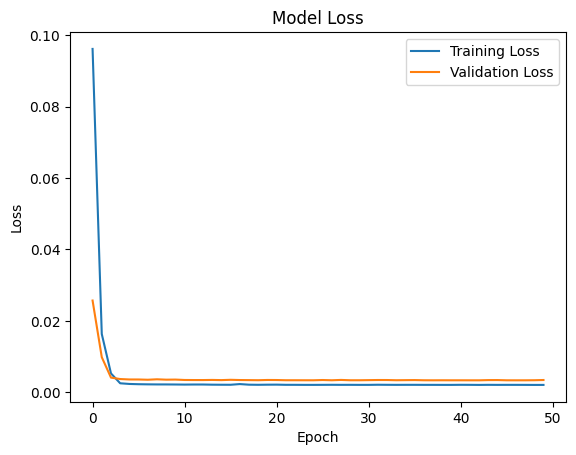

In [65]:
#Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Anomaly Detection:

In [69]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Reshape predictions to match x_test
predictions = predictions.reshape(x_test.shape)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.abs(predictions - x_test), axis=1)

# Define a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 90)

# Identify anomalous days
anomalous_days_indices = np.where(reconstruction_error > threshold)[0]
anomalous_days = [i + split_index + sequence_length for i in anomalous_days_indices]


# Print the indices of the anomalous days in the original dataset
print("Indices of anomalous days:", anomalous_days)

for index in anomalous_days:
    print(f"Anomalous day: {data['date'][index]}, Temperature: {data['temperature'][index]}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Indices of anomalous days: [2051, 2052, 2053, 2054, 2055, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2261, 2262, 2267, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313]
Anomalous day: 2019-08-14, Temperature: 0.5622633157095326
Anomalous day: 2019-08-15, Temperature: 0.5695827268448718
Anomalous day: 2019-08-16, Temperature: 0.5828154460601737
Anomalous day: 2019-08-17, Temperature: 0.5390301216096667
Anomalous day: 2019-08-18, Temperature: 0.5592531423074303
Anomalous day: 2019-08-21, Temperature: 0.599485826066671
Anomalous day: 2019-08-22, Temperature: 0.5953288307032477
Anomalous day: 2019-08-23, Temperature: 0.620797641465142
Anomalous day: 2019-08-24, Temperature: 0.5790874526550742
Anomalous day: 2019-08-25, Temperature: 0.5992402260790327
Anomalous day: 2019-08-26, Temperature

# Visualize the results:

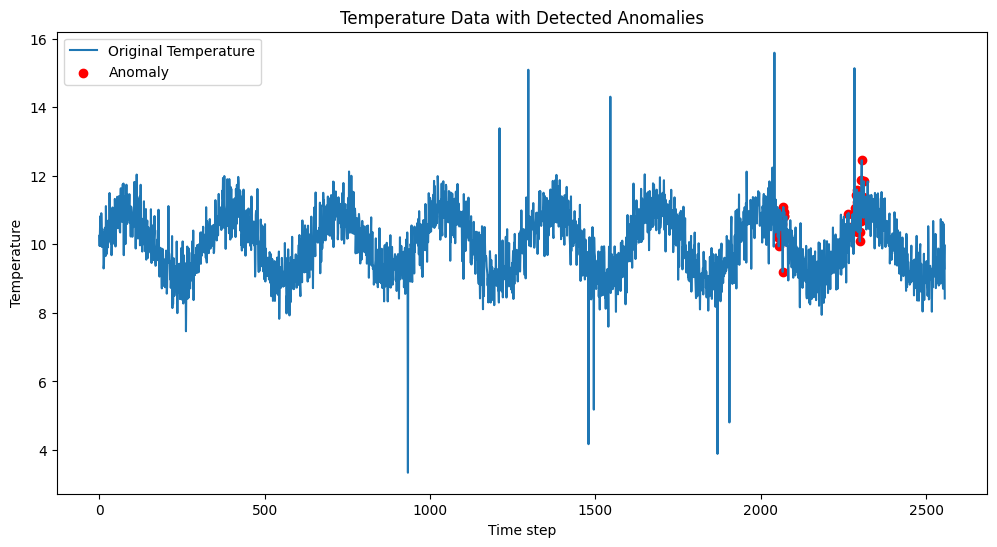

In [70]:
# Inverse transform the temperature data to original scale
original_temperature = scaler.inverse_transform(data[['temperature']])

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(original_temperature, label='Original Temperature')

# Highlight the anomalies
for index in anomalous_days:
    plt.scatter(index, original_temperature[index], color='red', label='Anomaly' if index == anomalous_days[0] else "")  # Only show label once

plt.xlabel('Time step')
plt.ylabel('Temperature')
plt.title('Temperature Data with Detected Anomalies')
plt.legend()
plt.show()